# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Chris Kollbaum

https://github.com/kollbaumc/Module6Webmining

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

# Answer Question 1

In [3]:
import requests
import pickle
article = requests.get(' https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
article_html = article.text

with open('python-match.pkl', 'wb') as f:
    pickle.dump(article.text, f)
with open('python-match.pkl', 'rb') as f:
    article_html = pickle.load(f)



2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

# Answer Question 2

In [4]:
from bs4 import BeautifulSoup

parser = 'html.parser'
s = BeautifulSoup(article_html, parser)
article_element = s.find('article')

print(article_element.get_text())




How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

# Answer Question 3

In [5]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_element.get_text())
t = [token.text.lower() for token in doc if token.is_stop != True and token.is_punct != True and token.is_space != True]   
print(t)

['laser', 'headlights', 'work', '130', 'comments', 'lewin', 'day', 'march', '22', '2021', 'think', 'onward', 'march', 'automotive', 'technology', 'headlights', 'usually', 'thing', 'come', 'mind', 'engines', 'fuel', 'efficiency', 'switch', 'electric', 'power', 'mind', 'mean', 'thousands', 'engineers', 'world', 'working', 'improve', 'state', 'art', 'automotive', 'lighting', 'day', 'day', 'sealed', 'beam', 'headlights', 'gave', 'way', 'modern', 'designs', 'regulations', 'loosened', 'bulbs', 'moved', 'simple', 'halogens', 'xenon', 'hids', 'recently', 'leds', 'new', 'technology', 'scene', 'lasers', 'laser', 'headlights', 'bwm', 'prototype', 'laser', 'headlight', 'assemblies', 'undergoing', 'testing', 'image', 'brought', 'mind', 'phrase', 'laser', 'headlights', 'laser', 'beams', 'firing', 'automobile', 'obviously', 'coherent', 'beams', 'monochromatic', 'light', 'poor', 'illumination', 'outside', 'specific', 'spot', 'distance', 'away', 'thankfully', 'eyes', 'laser', 'headlights', 'work', 'way

In [6]:
from collections import Counter
word_freq = Counter(t)
common_tokens = word_freq.most_common(5)
print('These are the common tokens in the text.')
print(common_tokens)

These are the common tokens in the text.
[('laser', 35), ('headlights', 19), ('headlight', 11), ('technology', 10), ('led', 10)]


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

# Answer Question 4

In [7]:
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)


lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(lemmas)
print('These are the most common lemmas in the text.')
print(lemma_freq.most_common(5))
    

These are the most common lemmas in the text.
[('laser', 40), ('headlight', 28), ('beam', 12), ('led', 11), ('technology', 10)]


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

# Answer Question 5

In [13]:
top_tokens = ['laser', 'headlights', 'technology', 'headlight', 'led'] #The words we are testing
sentences = list(doc.sents)
#Finding the word count of a sentence.
def wordCount(sentence):
    for count in sentences:
        count1 = 0
        for token in sentence:
            if not (token.is_space or token.is_punct):
                count1 +=1
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    return count1

print('This is the actual first sentence in the text.  Sentence index of 0 is the title of the article.')
print(sentences[1]) #Printing the sentence we are testing

#Here is our function that gives the score.        
def score_sentence_by_tokens(sentence, interesting_token):
    for count in sentences:
        count3 = 0 
        for token in sentence:
            if (token.text.lower() in interesting_token):
                count3 +=1
    return count3/wordCount(sentence)

score_sentence_by_tokens(sentences[1], top_tokens) #Here is the test of the function
    
#The score is 2/21.  Two tokens in the list divided by the 21 words in the sentence.        

This is the actual first sentence in the text.  Sentence index of 0 is the title of the article.
When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.


0.09523809523809523

In [14]:
top_lemmas = ['laser', 'headlight', 'beam', 'technology', 'light'] #The lemmas we are testing

#Finding the word count of a sentence.
def wordCount(sentence):
    for count in sentences:
        count1 = 0
        for token in sentence:
            if not (token.is_space or token.is_punct):
                count1 +=1
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    return count1

print('This is the actual first sentence in the text.  Sentence index of 0 is the title of the article.')
print(sentences[1]) #Printing the sentence we are testing

#Here is our function that gives the score.        
def score_sentence_by_lemma(sentence, interesting_lemma):
    for count in sentences:
        count3 = 0 
        for token in sentence:
            if (token.lemma_.lower() in interesting_lemma):
                count3 +=1
    return count3/wordCount(sentence)

score_sentence_by_lemma(sentences[1], top_lemmas) #Here is the test of the function
    
#Notice that the scores for tokens and lemmas are the same.
#Notice that headlights is not in the list, but it is a lemma of headlight so it is still in our count.  

This is the actual first sentence in the text.  Sentence index of 0 is the title of the article.
When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.


0.09523809523809523

# Answer Question 6

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [127]:
results = list()
for i in range(len(sentences)):
    results.append(score_sentence_by_tokens(sentences[i], top_tokens))
    
print(results)

[0.16666666666666666, 0.09523809523809523, 0.0, 0.0, 0.038461538461538464, 0.1, 1.0, 0.25, 0.13043478260869565, 0.0, 0.14285714285714285, 0.25, 0.0, 0.045454545454545456, 0.2222222222222222, 0.0, 0.1875, 0.15, 0.09090909090909091, 0.07692307692307693, 0.05263157894736842, 0.0, 0.045454545454545456, 0.07407407407407407, 0.038461538461538464, 0.0, 0.03333333333333333, 0.29411764705882354, 0.05555555555555555, 0.0, 0.14285714285714285, 0.15151515151515152, 0.05263157894736842, 0.05555555555555555, 0.12903225806451613, 0.0, 0.0, 0.0, 0.07142857142857142, 0.07142857142857142, 0.0, 0.0, 0.04, 0.05555555555555555, 0.125, 0.07317073170731707, 0.03225806451612903, 0.08333333333333333, 0.1111111111111111, 0.04, 0.12, 0.06060606060606061, 0.08695652173913043, 0.07407407407407407, 0.0, 0.0, 0.4]


In [76]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

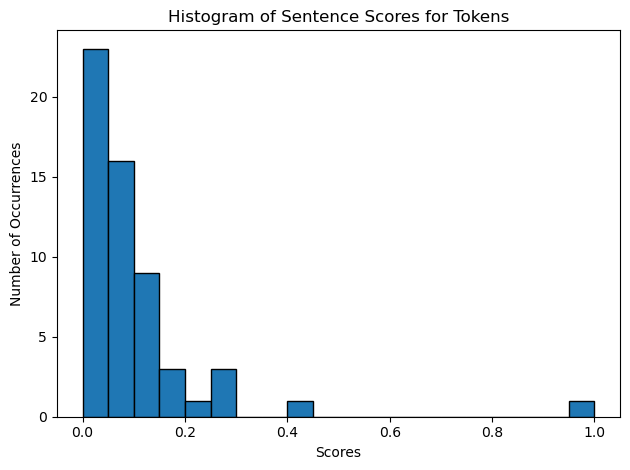

In [129]:
plt.hist(results, bins = 20, edgecolor = 'black')
plt.title('Histogram of Sentence Scores for Tokens')
plt.xlabel('Scores')
plt.ylabel('Number of Occurrences')
plt.tight_layout()

#The most common range of scores for tokens in the sentences is from .0 to .05.  



7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

# Answer Question 7

In [121]:
results1 = list()
for i in range(len(sentences)):
    results1.append(score_sentence_by_lemma(sentences[i], top_lemmas))
    
print(results)

[0.08333333333333333, 0.09523809523809523, 0.0, 0.0, 0.07692307692307693, 0.2, 0.5, 0.25, 0.17391304347826086, 0.09523809523809523, 0.14285714285714285, 0.25, 0.0625, 0.09090909090909091, 0.2222222222222222, 0.045454545454545456, 0.1875, 0.15, 0.09090909090909091, 0.11538461538461539, 0.05263157894736842, 0.1, 0.045454545454545456, 0.1111111111111111, 0.038461538461538464, 0.0, 0.03333333333333333, 0.23529411764705882, 0.05555555555555555, 0.0, 0.09523809523809523, 0.12121212121212122, 0.05263157894736842, 0.05555555555555555, 0.06451612903225806, 0.0, 0.0, 0.0, 0.07142857142857142, 0.14285714285714285, 0.05714285714285714, 0.0, 0.04, 0.05555555555555555, 0.125, 0.14634146341463414, 0.06451612903225806, 0.08333333333333333, 0.1111111111111111, 0.04, 0.12, 0.030303030303030304, 0.13043478260869565, 0.07407407407407407, 0.041666666666666664, 0.045454545454545456, 0.4666666666666667]


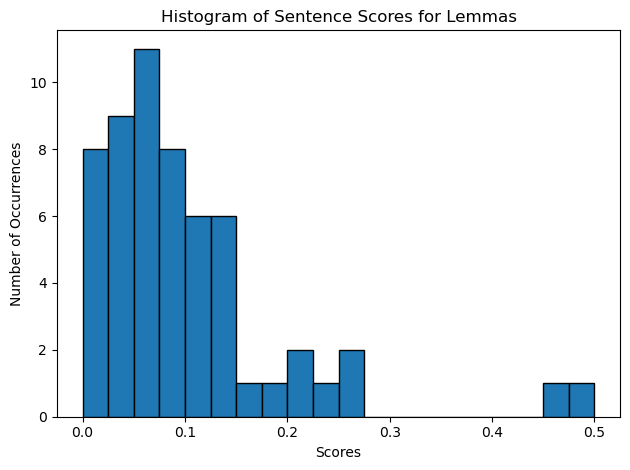

In [133]:
plt.hist(results1, bins = 20, edgecolor = 'black')
plt.title('Histogram of Sentence Scores for Lemmas')
plt.xlabel('Scores')
plt.ylabel('Number of Occurrences')
plt.tight_layout()

# The most common range of lemma scores is from .05 to .075.  


8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

# Answer Question 8

I guess in certain instances we could use laser or beam as verbs.  'led' would probably be an adjective and would be ommitted. We would use token.pos_ == 'NOUN' in the same portion of the code where we got rid of our punctuation and stop words.  